In [78]:
from Bio.SeqIO.FastaIO import SimpleFastaParser  # low level fast fasta parser
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
%%bash
ls -lh ./data

total 11M
-rwxrwxrwx 1 root root 3.3M Nov 30 11:08 DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root 3.2M Nov 30 11:08 DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root 3.8M Nov 30 11:08 DK-AID_S133_L001_R1_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root   83 Dec 12 11:49 test.txt


In [79]:

def get_duplex_pos(in_file):
    
    nucleotides = ['A', 'T', 'G', 'C']
    
    with open(in_file) as in_handle:
        for title, seq in SimpleFastaParser(in_handle):
            seq = seq
            break
    
    start = 0
    
    d = {}
    
    # this part could be another function
    while start != len(seq)-1:
        
        if seq[start] == 'C':
            first_duplex_nuc = seq[start]
            first_pos = start
            # + 1 to get slice from the next letter
            
            second_pos = start + 1
            for nuc in seq[start + 1:]:
                if nuc in nucleotides:
                    second_duplex_nuc = nuc
                    break
                else:
                    second_pos += 1
                    
            d[(first_pos, second_pos)] = {'ref_duplex' : first_duplex_nuc + second_duplex_nuc, \
                                          'A' : 0, 'T' : 0, 'G' : 0, 'C' : 0, '-' : 0}
            # incrementing index
            start += 1
        else:
            # increment anyway
            start += 1
        
    return d


In [80]:

def collect_snp(in_file, d):
    cov = 0 
    with open(in_file) as in_handle:
        reads = SimpleFastaParser(in_handle)
        for record in reads:
            cov += 1
            read = record[1] 
            for duplex_pos in d.keys():
                # here's some thought:
                # 1. if you crop the variants where second pos in the duplex in the read is diff, you get 
                # twice as less variants as if you drop the expression after 'and' 
                # so, do we really need just to count snps or context ?
                # check it out : it seem work as well
                # print(read[duplex_pos[0]], read[duplex_pos[1]], d[duplex_pos]['ref_duplex'])
                if read[duplex_pos[0]] != 'C' and read[duplex_pos[0]] != '-' \
                and read[duplex_pos[1]] == d[duplex_pos]['ref_duplex'][1]:
                    
                    snp = read[duplex_pos[0]]
                    
                    
                    d[duplex_pos][snp] += 1
            
        
    return  d, cov

In [121]:
d = get_duplex_pos('./data/DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta')

In [122]:
d

{(7, 9): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (13, 14): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (21, 22): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (26, 27): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (29, 30): {'ref_duplex': 'CC', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (30, 31): {'ref_duplex': 'CA', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (33, 34): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (40, 41): {'ref_duplex': 'CC', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (41, 42): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (44, 45): {'ref_duplex': 'CG', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (46, 51): {'ref_duplex': 'CG', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (55, 58): {'ref_duplex': 'CG', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (60, 61): {'ref_duplex': 'CC', 'A': 0, 'T': 0, 'G': 0, 'C': 0, '-': 0},
 (61, 62): {'ref_duplex': 'CT', 'A': 0, 'T': 0, 'G': 

In [123]:
d_up, cov = collect_snp('./data/DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta', d)

In [125]:
d_up

{(7, 9): {'ref_duplex': 'CT', 'A': 30, 'T': 78, 'G': 47, 'C': 0, '-': 0},
 (13, 14): {'ref_duplex': 'CT', 'A': 24, 'T': 55, 'G': 68, 'C': 0, '-': 0},
 (21, 22): {'ref_duplex': 'CT', 'A': 20, 'T': 34, 'G': 44, 'C': 0, '-': 0},
 (26, 27): {'ref_duplex': 'CT', 'A': 10, 'T': 14, 'G': 16, 'C': 0, '-': 0},
 (29, 30): {'ref_duplex': 'CC', 'A': 21, 'T': 17, 'G': 21, 'C': 0, '-': 0},
 (30, 31): {'ref_duplex': 'CA', 'A': 27, 'T': 22, 'G': 43, 'C': 0, '-': 0},
 (33, 34): {'ref_duplex': 'CT', 'A': 36, 'T': 18, 'G': 47, 'C': 0, '-': 0},
 (40, 41): {'ref_duplex': 'CC', 'A': 17, 'T': 33, 'G': 20, 'C': 0, '-': 0},
 (41, 42): {'ref_duplex': 'CT', 'A': 6, 'T': 19, 'G': 31, 'C': 0, '-': 0},
 (44, 45): {'ref_duplex': 'CG', 'A': 26, 'T': 107, 'G': 70, 'C': 0, '-': 0},
 (46, 51): {'ref_duplex': 'CG', 'A': 26, 'T': 61, 'G': 91, 'C': 0, '-': 0},
 (55, 58): {'ref_duplex': 'CG', 'A': 34, 'T': 39, 'G': 12, 'C': 0, '-': 0},
 (60, 61): {'ref_duplex': 'CC', 'A': 19, 'T': 22, 'G': 15, 'C': 0, '-': 0},
 (61, 62): {'r

In [126]:
cov

8928

In [127]:
seq = 'AAACAAACAAA---ACAAA'
for c, v in enumerate(seq):
    print(c, '--->', v)

0 ---> A
1 ---> A
2 ---> A
3 ---> C
4 ---> A
5 ---> A
6 ---> A
7 ---> C
8 ---> A
9 ---> A
10 ---> A
11 ---> -
12 ---> -
13 ---> -
14 ---> A
15 ---> C
16 ---> A
17 ---> A
18 ---> A


In [128]:
seq = '''AT-G-G-C-T-G-CTA-G-G-CTGTGCTGCCAACTGG-ATCCTGCGC----GGGAC--GTCCTTTGTTT--------ACGTC---CCGTCGGCGCTGA-ATCCT-GC--GGAC-GACCC-TT--CT-CG----------GGG-TCGCTTGG--GACTCTCTCGTCCCCT------T-CTCCGT-C---TGC-CGTTCCG-A-CC--GAC--CAC-GGG-GC-GCACCTCTCTTTACG--CGGACTCC-CC-GTCTGTGCCTTCTCAT-CTGCC-G-G--A-CC--GTG---T--G-C-A--C--T'''

In [129]:
len(seq)

305

In [130]:
a_data = []
t_data = []
g_data = []
c_data = []

for key in d_up.keys():
    a_data.append(d_up[key]['A'])
    t_data.append(d_up[key]['T'])
    g_data.append(d_up[key]['G'])
    c_data.append(d_up[key]['C'])
    
    

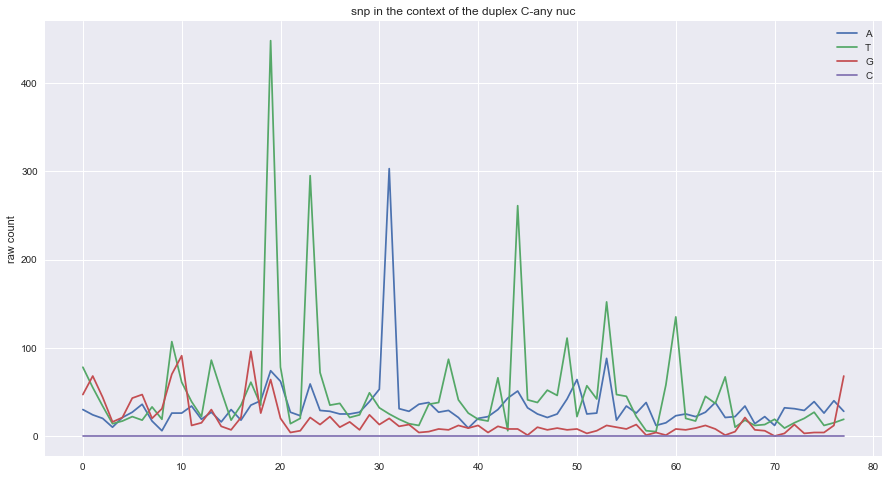

In [131]:
plt.figure(figsize=(15, 8))
plt.plot(a_data, label="A")
plt.plot(t_data, label="T")
plt.plot(g_data, label="G")
plt.plot(c_data, label="C")
plt.title('snp in the context of the duplex C-any nuc')
plt.ylabel('raw count')
plt.legend()

In [132]:
c_duplex_types = ['CA', 'CT', 'CG', 'CC']

In [133]:
import pandas as pd

In [134]:
df = pd.DataFrame(d_up)

In [135]:
df = df.T

In [136]:
context_data = df.groupby('ref_duplex').sum()

In [137]:
context_data

,-,A,C,G,T
ref_duplex,,,,,
CA,0,122,0,68,160
CC,0,674,0,261,965
CG,0,822,0,507,2042
CT,0,979,0,523,684


In [138]:
context_data.drop(['-'], axis=1, inplace=True)
context_data.drop(['C'], axis=1, inplace=True)

In [139]:
context_data

,A,G,T
ref_duplex,,,
CA,122,68,160
CC,674,261,965
CG,822,507,2042
CT,979,523,684


In [140]:
context_data.loc['CA', : ]

A    122
G     68
T    160
Name: CA, dtype: int64

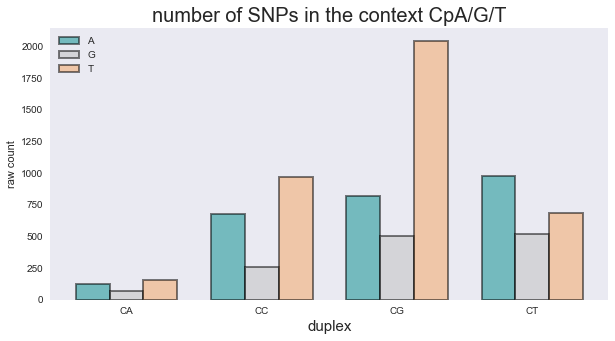

In [141]:
# Setting the positions and width for the bars
pos = list(range(len(context_data['A']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        context_data['A'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='darkcyan', 
        edgecolor='black',
        lw=2,
        # with label the first value in first_name
        label=context_data.index[0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        context_data['G'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='silver', 
        edgecolor='black',
        lw=2,
        # with label the second value in first_name
        label=context_data.index[1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        context_data['T'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='sandybrown', 
        edgecolor='black',
        lw=2,
        # with label the third value in first_name
        label=context_data.index[2]) 

# Set the y axis label
ax.set_ylabel('raw count')
ax.set_xlabel('duplex', fontsize=15)
# Set the chart's title
ax.set_title('number of SNPs in the context CpA/G/T', fontsize='20')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(context_data.index)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend([context_data.columns[0], 
            context_data.columns[1],
            context_data.columns[2]], loc='upper left')

plt.grid()
plt.show()